In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Collab DataSets/credit_data.csv")
df.head(10)

,clientid,income,age,loan,LTI,default
0,1,66155.925095,59.017015,8106.532131,0.122537,0
1,2,34415.153966,48.117153,6564.745018,0.190752,0
2,3,57317.170063,63.108049,8020.953296,0.139940,0
3,4,42709.534201,45.751972,6103.642260,0.142911,0
4,5,66952.688845,18.584336,8770.099235,0.130989,1
5,6,24904.064140,57.471607,15.498598,0.000622,0
6,7,48430.359613,26.809132,5722.581981,0.118161,0
7,8,24500.141984,32.897548,2971.003310,0.121265,1
8,9,40654.892537,55.496853,4755.825280,0.116980,0
9,10,25075.872771,39.776378,1409.230371,0.056199,0


In [3]:
defaulter = df[df["default"] == 1]
defaulter.shape

(283, 6)

In [4]:
df.describe()
print(df.isna().sum())

clientid    0
income      0
age         0
loan        0
LTI         0
default     0
dtype: int64


In [5]:
features = df[["income", "age", "loan"]]
target = df[["default"]]

In [6]:
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)

In [7]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size= 0.2, random_state = 0 )

In [8]:
model = KNeighborsClassifier(n_neighbors=3)
fit_model = model.fit(features_train, target_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [11]:
predictions = fit_model.predict(features_test)

In [13]:
print(confusion_matrix(target_test, predictions))
print(accuracy_score(target_test, predictions))

[[343   5]
 [  5  47]]
0.975


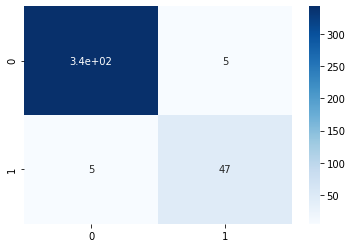

In [22]:
sns.heatmap(confusion_matrix(target_test, predictions), annot = True, cmap="Blues")

In [43]:
validates = []
for k in range(1,100):
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, features, target, cv=10, scoring="accuracy")
  validates.append(scores.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [52]:
max = np.argmax(validates)
max

32